<a href="https://colab.research.google.com/github/joan-chep/WEEK_7_IP_CORE/blob/main/Moringa_Data_Science_Core_W7_Independent_Project_2022_02_Joan_Chepkwony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 (a) Defing the Question

We want to study the factors that affect housing prices using information collected on real estate properties.

1 (b) Defining the Metric for Success

To be able to create a model that allows Hass Consulting to accurately predict the prices of houses using the specified predictor variables.

1 (c) Understanding the Context

Hass Consulting Company is a real estate leader in Kenya with over 25 years of experience that offers a variety of services such as ;

  Property sales and letting
  Property market research
  Asset valuation
  Property and Facilities management
Hass Consult has proven to be an important company providing investors, home owners, the financial industry and consumers with current and historical information about house price inflation - allowing them to make informed decisions in the housing market, in order to enjoy the best possible returns.

1 (d) Recording the Experimental Design

Import the relevant libraries that we will use in our analysis

Read and explore the dataset we will use for our project

Define the appropriateness of the available data with regards to the project

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate, bivariate and multivariate analysis recording your observations.

Perform regression analysis and incorporate categorical independent variables into our models.

Check for multicollinearity.

Create residual plots for your models, and assess heteroskedasticity using Barlett's test.

Provide a recommendation based on our analysis.
Challenge our solution by performing modelling using the following regression techniques [Multiple Linear, Quantile regression, Ridge, Lasso, Elastic Net] then evaluate their performance.

2. Importing Libraries

In [ ]:
# Importing the libraries to be used
#
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')
!pip install fsspec

     |████████████████████████████████| 133 kB 7.6 MB/s 


Loading The Data

In [ ]:
# Reading the dataset
hass_consulting = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

Viewing the Dataset

In [ ]:
# Checking for the first five values hass_consulting dataset
hass_consulting.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Checking for the last five values hass_consulting dataset
hass_consulting.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking for datatypes for the hass_consulting dataset
hass_consulting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

All the columns have the correct datatype

In [ ]:
# Checking for the shape of the hass_consulting dataset

hass_consulting.shape

(21613, 20)

The dataset has 21613 rows and 20 columns

In [ ]:
# checking the columns in the hass_consulting dataset

hass_consulting.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Data Cleaning

In [ ]:
# Checking for missing values
hass_consulting.isnull().any()

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

There are no missing values in our dataset

In [ ]:
# Checking for duplicates in the dataset
hass_consulting.duplicated().sum()

3

The dataset has 3 duplicates

In [ ]:
# Dropping the duplicated values in the dataset
hass_consulting.drop_duplicates(inplace = True)

In [ ]:
# Dropping the lat,long and id columns
hass_consulting.drop(['lat','long','id'], inplace = True, axis = 1)
hass_consulting

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


I droppped these three columns because I do not need them in my analysis

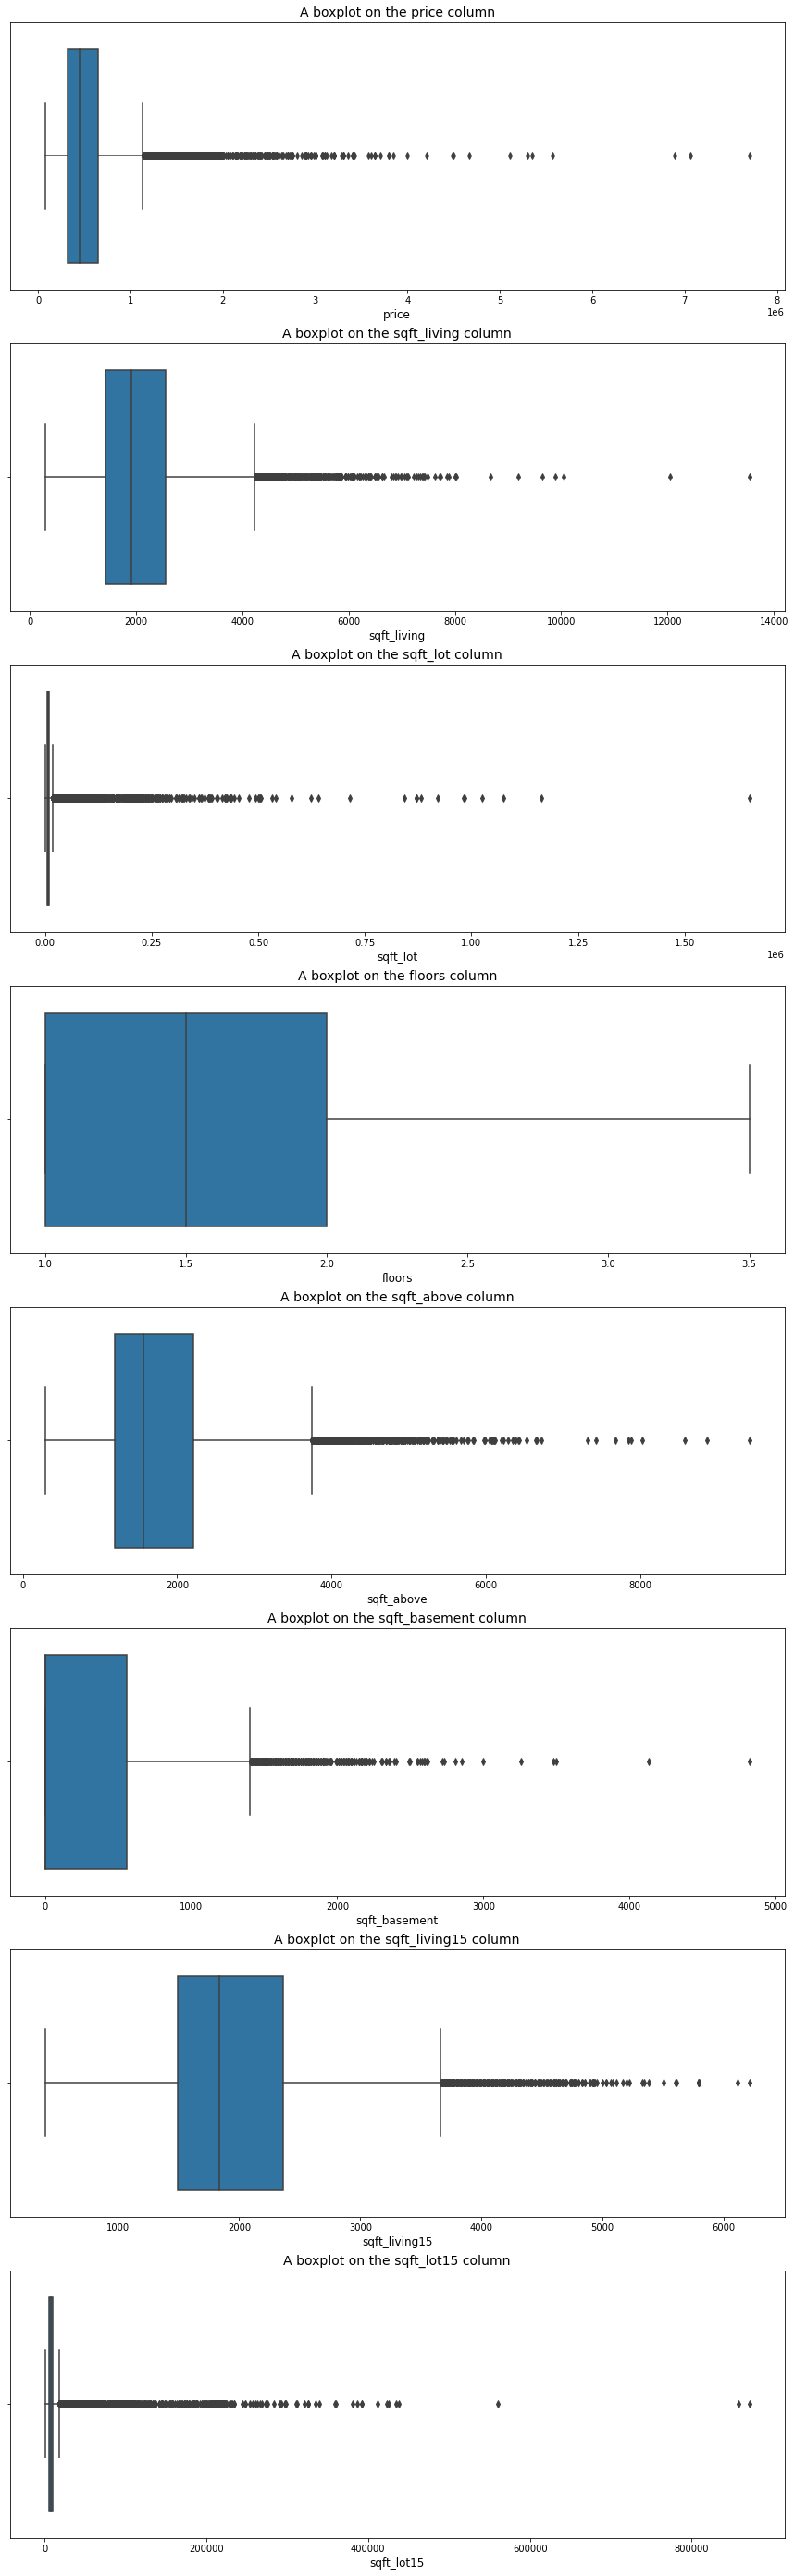

In [ ]:
# Checking for any available Outliers
col_names = ['price','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_living15','sqft_lot15']

fig, ax = plt.subplots(len(col_names), figsize = (15,50))

for i, col_val in enumerate(col_names):

  sns.boxplot(x = hass_consulting[col_val], ax=ax[i])
  ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
  ax[i].set_xlabel(col_val, fontsize=12)


From the observation there are anomalies in our dataset but we will not drop them because they represent true values of our data

Exloratory Data Analysis.
1. Univariate Analysis

Numerical Variables

In [ ]:
# Getting summary statistics for the numerical columns in the dataset
hass_consulting.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,1986.518695,12769.031976
std,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,685.425781,27305.972464
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


Measures of Central Tendancy

In [ ]:
# Finding all the measures of Central Tendancy
print('The means of our numerical values are \n', hass_consulting.mean())
print('\n The medians of our numerical values are\n', hass_consulting.median())
print('\n The modes of our numerical values are \n', hass_consulting.mode())

The means of our numerical values are 
 price            540178.944840
bedrooms              3.370847
bathrooms             2.114739
sqft_living        2079.881212
sqft_lot          15108.289820
floors                1.494239
waterfront            0.007543
view                  0.234197
condition             3.409440
grade                 7.656779
sqft_above         1788.347894
sqft_basement       291.533318
yr_built           1971.003609
yr_renovated         84.322351
zipcode           98077.945673
sqft_living15      1986.518695
sqft_lot15        12769.031976
dtype: float64

 The medians of our numerical values are
 price            450000.00
bedrooms              3.00
bathrooms             2.25
sqft_living        1910.00
sqft_lot           7619.00
floors                1.50
waterfront            0.00
view                  0.00
condition             3.00
grade                 7.00
sqft_above         1560.00
sqft_basement         0.00
yr_built           1975.00
yr_renovated          0.

Measures of Dispersion

In [ ]:
# Finding all the measures of Dispersion
print('\nThe standard deviations of our numerical values are\n', hass_consulting.std())
print('\n The variances of our numerical values are\n',hass_consulting.var())
print('\n The ranges of our numerical values are\n',hass_consulting.max()-hass_consulting.min())
print('\n The kurtosis of our numerical values are\n',hass_consulting.kurt())
print('\n The skewness of our numerical values are\n',hass_consulting.skew())


The standard deviations of our numerical values are
 price            367387.585054
bedrooms              0.930110
bathrooms             0.770204
sqft_living         918.500299
sqft_lot          41423.226737
floors                0.539994
waterfront            0.086523
view                  0.766136
condition             0.650764
grade                 1.175500
sqft_above          828.138723
sqft_basement       442.596699
yr_built             29.372639
yr_renovated        401.499264
zipcode              53.505373
sqft_living15       685.425781
sqft_lot15        27305.972464
dtype: float64

 The variances of our numerical values are
 price            1.349736e+11
bedrooms         8.651041e-01
bathrooms        5.932137e-01
sqft_living      8.436428e+05
sqft_lot         1.715884e+09
floors           2.915930e-01
waterfront       7.486257e-03
view             5.869651e-01
condition        4.234936e-01
grade            1.381801e+00
sqft_above       6.858137e+05
sqft_basement    1.958918e+05

Plotting Bar Graphs

Text(0.5, 1.0, 'A plot on the number of floors')

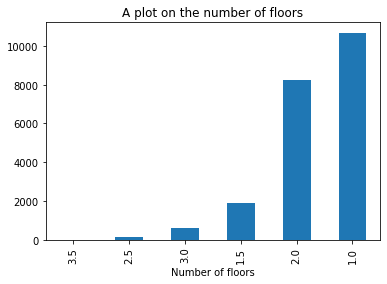

In [ ]:
# Plotting a bar graph to show the distribution in the number of floors
hass_consulting.floors.value_counts().sort_values().plot.bar()
plt.xlabel('Number of floors')
plt.title('A plot on the number of floors')


Text(0.5, 1.0, 'A plot on the number of bedrooms')

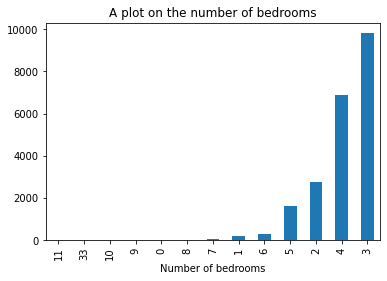

In [ ]:
# Plotting a bar graph to show the distribution in the number of bedrooms
hass_consulting.bedrooms.value_counts().sort_values().plot.bar()
plt.xlabel('Number of bedrooms')
plt.title('A plot on the number of bedrooms')

Bivariate Analysis

Numerical and Numerical Variables

Scatter Plots

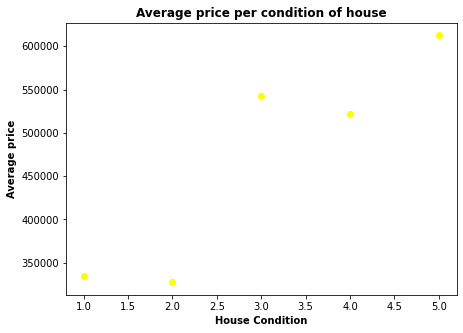

In [ ]:
# A scatter plot to show the relationship between the price and the condition of the house
condition =hass_consulting.groupby('condition')['price'].mean().reset_index(name='average price per condition')
plt.figure(figsize=(7,5))
plt.scatter(condition['condition'] , condition['average price per condition'], color='yellow')
plt.xlabel("House Condition", fontweight='bold')
plt.ylabel("Average price", fontweight='bold')
plt.title("Average price per condition of house", y=1.0, fontweight='bold')
plt.show()

From the observation when the House Condition is good the Average House Price is high and when the House Condition is not good the Average Price is low.

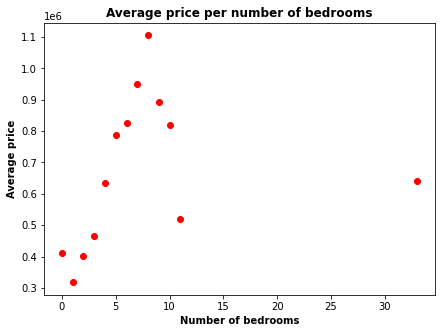

In [ ]:
# A scatter plot to show the relationship between price and the number of bedrooms
bed =hass_consulting.groupby('bedrooms')['price'].mean().reset_index(name='average price per number of bedrooms')
plt.figure(figsize=(7,5))
plt.scatter(bed['bedrooms'] , bed['average price per number of bedrooms'], color='red')
plt.xlabel("Number of bedrooms", fontweight='bold')
plt.ylabel("Average price", fontweight='bold')
plt.title("Average price per number of bedrooms", y=1.0, fontweight='bold')
plt.show()

From the observation as the number of bedrooms increases the Average price also increases.

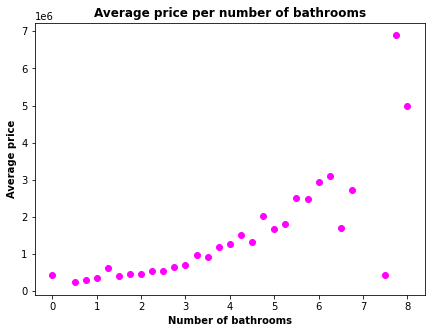

In [ ]:
# A scatter plot to show the relationship between price and the number of bathrooms
price =hass_consulting.groupby('bathrooms')['price'].mean().reset_index(name='average price per number of bathrooms')
plt.figure(figsize=(7,5))
plt.scatter(price['bathrooms'] , price['average price per number of bathrooms'], color='magenta')
plt.xlabel("Number of bathrooms", fontweight='bold')
plt.ylabel("Average price", fontweight='bold')
plt.title("Average price per number of bathrooms", y=1.0, fontweight='bold')
plt.show()

From the observation, the Average price increases as the number of bathrooms increases.

Bar Graphs

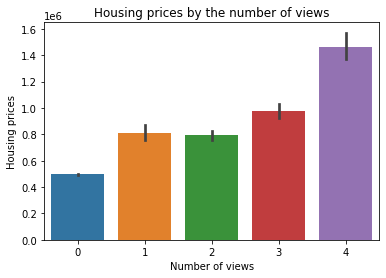

In [ ]:
# A bar graph to show the relationship between housing prices and number of views
hass_consulting_1 = hass_consulting.groupby('price').sum()
hass_consulting_1 = hass_consulting_1.reset_index(inplace=True)

sns.barplot(x = hass_consulting['view'], y = hass_consulting['price'], data=hass_consulting_1)
plt.xlabel('Number of views')
plt.ylabel('Housing prices')
plt.title('Housing prices by the number of views')
plt.show()

From the observation,the housing prices increase as the number of views increases.

Histogram

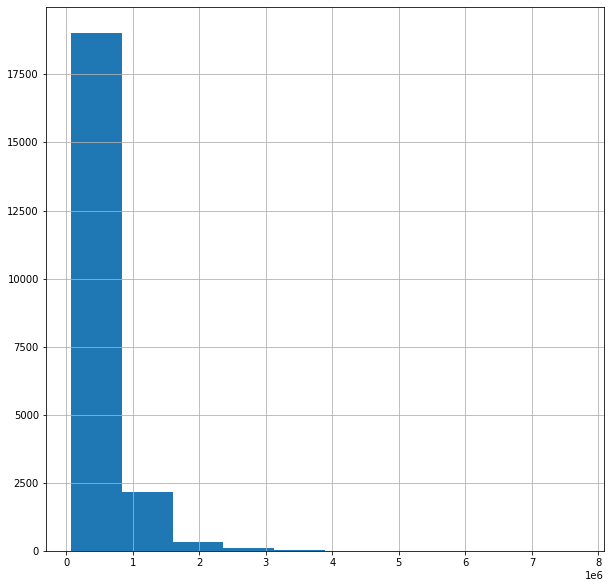

In [ ]:
# Plotting a histogram for the price and the living room area.
hass_consulting['price'].hist(bins=10, figsize=(10, 10))

Correlation

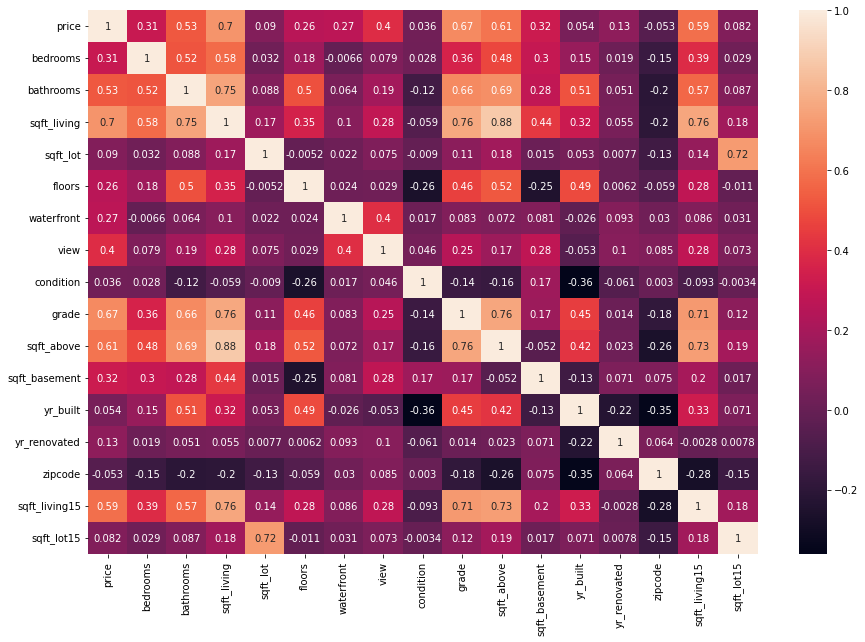

In [ ]:
# Visualizing the correlation using a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(hass_consulting.corr(), annot=True)
plt.show()


sqft_above and sqft_living have high positive correlation. Additionally most of the variables are positively correlated.

Multivariate Analysis

In [ ]:
# Plotting a pair plot to show the distribution of variables
sns.pairplot(hass_consulting)
plt.show()

Regression Analysis

In [ ]:
# Creating a copy of our dataset
hass_consulting_1 =hass_consulting.copy()

Label Encoding

In [ ]:
# LabelEncoding the zipcode column
le = LabelEncoder()
hass_consulting['zipcode'] = le.fit_transform(hass_consulting['zipcode'])

In [ ]:
# Defining the X and y variables
X = hass_consulting.drop(['price'],axis=1)
y = hass_consulting['price']

Checking for Multicollinearity

In [ ]:
# First we check how our independent variables are correlated
# Remove the price column, we want to focus on our independent variables only.
independent_variables = hass_consulting.drop(columns=['price'])

# Let's display the correlations between the variables
correlation = independent_variables.corr()
correlation

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152075,0.391633,0.029233
bathrooms,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.192830,0.568665,0.087191
sqft_living,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.192014,0.756420,0.183285
sqft_lot,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.125941,0.144620,0.718556
floors,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.038685,0.279861,-0.011250
waterfront,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.029114,0.086469,0.030702
view,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.071338,0.280404,0.072577
condition,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,-0.006397,-0.092854,-0.003424
grade,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,-0.174943,0.713208,0.119265
sqft_above,0.477619,0.685351,0.876600,0.183527,0.523874,0.072080,0.167659,-0.158212,0.755919,1.000000,-0.051923,0.423922,0.023233,-0.244044,0.731870,0.194060


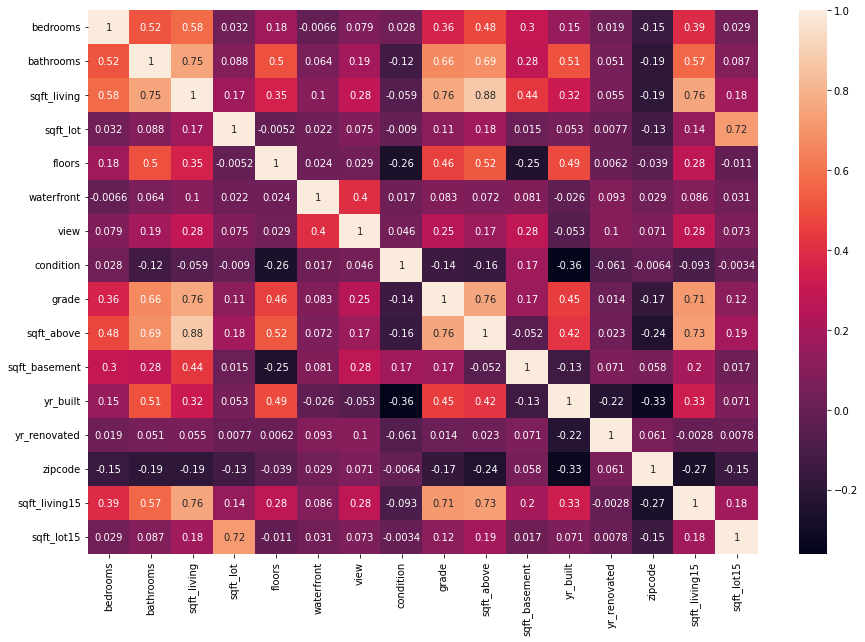

In [ ]:
# Visualizing the correlation using a heatmap
plt.subplots(figsize =  (15,10))
sns.heatmap(independent_variables.corr(), annot=True)
plt.show()

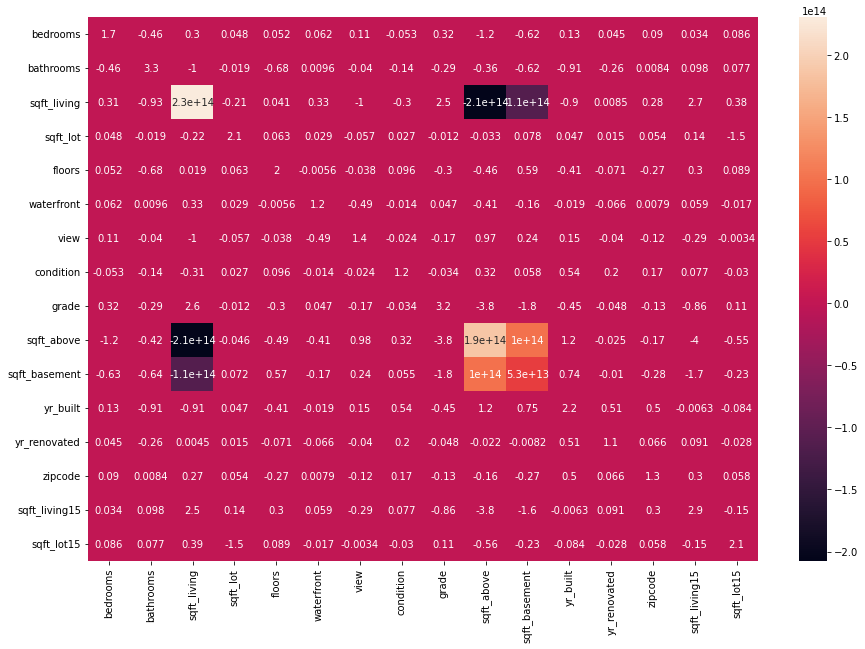

In [ ]:
# Checking for multicollinearity using the VIF (Variation Inflation Factor)
vif = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)

# Visualize the VIF using a heatmap
plt.subplots(figsize =  (15,10))
sns.heatmap(vif, annot = True)
plt.show()

From the observation of the VIF heatmap, the VIF scores of sqft_living, sqft_basement and sqft_above are more than 10. This suggests that the are highly correlated.

In [ ]:
# Dropping the highly correlated columns
revised = independent_variables.drop(columns=['sqft_living','sqft_above','sqft_basement'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
bedrooms,1.456990,-0.794756,0.011886,0.073507,0.046010,0.077087,-0.059723,0.029061,0.226865,0.041214,0.081748,-0.254134,0.050294
bathrooms,-0.794756,2.690005,-0.061589,-0.473227,-0.006617,-0.152694,-0.171047,-0.729789,-0.721660,-0.262711,-0.044772,-0.311687,0.029260
sqft_lot,0.011886,-0.061589,2.078425,0.023506,0.022725,-0.048719,0.031119,-0.080380,0.060832,0.014406,0.062511,0.063598,-1.482664
floors,0.073507,-0.473227,0.023506,1.619707,-0.028004,0.087802,0.146869,-0.387343,-0.463545,-0.072150,-0.187361,0.141030,0.062100
waterfront,0.046010,-0.006617,0.022725,-0.028004,1.200446,-0.488936,-0.011472,0.015463,-0.013661,-0.066181,0.012689,0.023104,-0.021569
view,0.077087,-0.152694,-0.048719,0.087802,-0.488936,1.369533,-0.041965,-0.179865,0.183744,-0.040181,-0.146996,-0.277660,0.000795
condition,-0.059723,-0.171047,0.031119,0.146869,-0.011472,-0.041965,1.238225,-0.028192,0.550529,0.204078,0.162072,0.092021,-0.027089
grade,0.029061,-0.729789,-0.080380,-0.387343,0.015463,-0.179865,-0.028192,2.779613,-0.316228,-0.053139,-0.115678,-1.349367,0.050441
yr_built,0.226865,-0.721660,0.060832,-0.463545,-0.013661,0.183744,0.550529,-0.316228,2.152689,0.508232,0.515091,0.117932,-0.069677
yr_renovated,0.041214,-0.262711,0.014406,-0.072150,-0.066181,-0.040181,0.204078,-0.053139,0.508232,1.147045,0.065914,0.085450,-0.028645


Residual Plots

In [ ]:
# Let's start by creating a model based on our revised set of independent variables above
# then displaying the residual plot for it.

X = revised.values
y = hass_consulting['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
print(pd.DataFrame(residuals).describe())
print('*'*60)
residuals.mean()

                  0
count  4.322000e+03
mean  -2.203484e+03
std    2.199775e+05
min   -2.474606e+06
25%   -9.285849e+04
50%    1.158245e+04
75%    1.141418e+05
max    1.339513e+06
************************************************************


-2203.484106919895

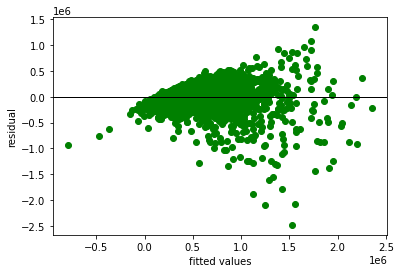

In [ ]:
# Residuals Plot
import matplotlib.pyplot as plt

plt.scatter(y_predict, residuals, color='green')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black', linewidth=1)
plt.show()

Checking for Heteroskedasticity

Using Barlett's Test

In [ ]:
# Importing the scipy library
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


Multivariate Linear Regression

In [ ]:
# First we define the predictor(y) variables and the target(x) variables
# The target variable is price
X = revised.values
y = hass_consulting['price'].values

In [ ]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [ ]:
# Scaling data using the StandardScaler() object
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
# Creating our baseline multivariate linear regression model
regressor = LinearRegression()

# We then fit our train set into the model
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

# We then get the mean squared error of our multivariate linear regression model for comparison purposes
first_model = (mean_squared_error(y_test,y_pred))
print(first_model)

53215412898.32087


The mean square error for this OLS is 53215412898.32087

Residual Plot for Multivariate Linear Regression Model

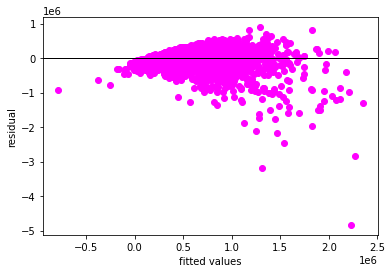

In [ ]:
import matplotlib.pyplot as plt

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

plt.scatter(y_pred, residuals, color='magenta')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black', linewidth=1)
plt.show()

In [ ]:
# Checking for accuracy using the r2 score
# First we import 
from sklearn import metrics
from sklearn.metrics import r2_score

r = r2_score(y_test,y_pred)
print(r)

0.6228966212887908


The OLS model has an accuracy of 62.29%

The accuracy of the multivariate Linear Regression is 62.29%.We will challenge the solution by performing other regression techniques to improve the accuracy of our model.

Quantile Regression

In [ ]:
import statsmodels.formula.api as smf
# Finding the regression coefficients for the conditioned median, 0.5 quantile
mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_lot + floors + waterfront + view + condition + grade + sqft_living15 + sqft_lot15', hass_consulting)
res = mod.fit(q=.5)

# Then print out the summary of model
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3176
Model:                       QuantReg   Bandwidth:                   2.761e+04
Method:                 Least Squares   Sparsity:                    3.753e+05
Date:                Sun, 13 Feb 2022   No. Observations:                21610
Time:                        18:33:43   Df Residuals:                    21599
                                        Df Model:                           10
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.147e+05   1.28e+04    -55.895      0.000    -7.4e+05    -6.9e+05
bedrooms       4619.6885   1642.385      2.813      0.005    1400.493    7838.884
bathrooms      1.875e+04   2581.487      7.264      0.000    1.37e+04    2.38e+04
sqft_lot          0.1929      0.044  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


 The accuracy of the quantile regression is given by the pseudo R-squared which is 31.76%

The quantile regression has an accuracy of 31.76% as compared to the multivariate linear regression model which has an accuracy level of 62.29%. This means that this model is not suitable.

2. Ridge Regression

In [ ]:
# Having already defined our x and y variables, we can go ahead to introduce the ridge object
X = revised.values
y = hass_consulting['price'].values

In [ ]:
# We first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error', n_jobs=1,refit=True,cv=10)

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
# .best_scores_ function to determine the models strength.
search.fit(X_train,y_train)
search.best_params_
{'alpha':0.001}
abs(search.best_score_)
# The best_params_ tells us what to set alpha  which in this case is 0.001 
# The best_score_ tells us what the best possible mean squared error is. 
# We find the best possible MSE using ridge regression is 48131653644.56
# The mean square error for our OLS model is 55999376029.73
# Already our ridge model is providing a better MSE as compared to the OLS mean square error

50793460525.213005

In [ ]:
# The ridge value is not cross validated
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred1 = ridge.predict(X_test)
second_model =(mean_squared_error(y_test,y_pred1))
print(second_model)

# Evidently our ridge model has a worse mean standard error than the ordinary least square model

53217800175.38388


In [ ]:
# Checking for accuracy using the r2 score
# First we import 
from sklearn import metrics
from sklearn.metrics import r2_score

r = r2_score(y_test,y_pred1)
print(r)

# The accuracy score while using ridge regression is similar to the one determined by our OLS model

0.622879704192834


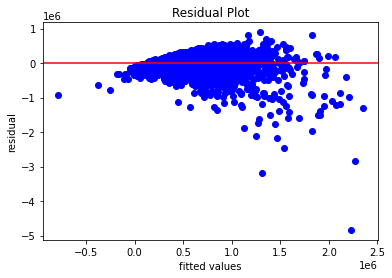

In [ ]:
# Residuals for the ridge model
residuals = y_pred1 - y_test

# Plotting the prediction errors using a residuals plot

plt.scatter(y_pred1, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

After evaluating the performance of our ridge model, we can go ahead and conclude that there is no difference between the accuracies of the two models (61.09%) therefore the use of ridge regression is not justifiable.

Lasso Regression.

In [ ]:
# Define the predictor and target variables
X = revised.values
y = hass_consulting['price'].values

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X = scaler.transform(X_train)

In [ ]:
# Choosing the set of parameters and creating our linear and lasso regression models for comparison
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')

In [ ]:
# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

# Keeping in mind that the higher the alpha, the simpler/less complex the model is. 
# The lasso score is 64% accurate which is quite good as compared to the other regression models

lasso best parameters: {'alpha': 0.1}
lasso score: 0.6349460783266567
linear score: 0.6349463802196574
lasso MSE: 49644416436.188255
linear MSE: 49644375381.15239
lasso best estimator coef: [-8.05404450e+03  1.10768440e+05  1.12284143e-01  2.10218790e+04
  5.48662345e+05  5.16719277e+04  1.98254444e+04  1.57690785e+05
 -4.06860167e+03  9.10693186e+00  1.24674443e+01  8.59429223e+01
 -3.15834658e-01]
linear coef: [-8.05424251e+03  1.10768765e+05  1.12284512e-01  2.10222396e+04
  5.48676197e+05  5.16713775e+04  1.98257124e+04  1.57690822e+05
 -4.06860671e+03  9.10663753e+00  1.24659266e+01  8.59427834e+01
 -3.15835223e-01]


Using Lasso regression technique, we can see that there is a slight improvement in accuracy (64.38%) as compared to the accuracy of our multivariate linear regression.

Elastic Net Regression.

In [ ]:
# Defining the x and y variables
X = revised.values
y = hass_consulting['price'].values

In [ ]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [ ]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)

# Alpha = 1e-05 while the l1_ratio = 0.8
# The mean square error for our OLS model is 55999376029.73
# # The MSE of our elastic model is better as it is less than the one for our linear model

{'alpha': 1e-05, 'l1_ratio': 0.8}


51806264914.59487

In [ ]:

# The best hyperparameters was an alpha set to 1e-05 and a l1_ratio of 0.8.  
# For clarity, we will set our hyperparameters to the recommended values and run on the data.

elastic=ElasticNet(normalize=True,alpha=0.1,l1_ratio=0.8)
elastic.fit(X,y)
y_pred2 = elastic.predict(X_test)
second_model=(mean_squared_error(y_test,y_pred2))
print(second_model)
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
y_pred2 = elastic.predict(X_test)
second_model=(mean_squared_error(y_test,y_pred2))
print(second_model)

# The mean square error for our OLS model is 55999376029.73 
# We are able to determine that the MSE for elastic regression is bigger than the OLS MSE
# thus elastic is performing worse than the OLS model

140180083733.22546
52876840672.68297


In [ ]:
# Checking for accuracy using the r2 score
# First we import r2 score under the metrics library
from sklearn import metrics
from sklearn.metrics import r2_score

r = r2_score(y_test,y_pred2)
print(r)

# The accuracy score for the ElasticNet regression is actually similar to the accuracy score of the OLS

0.625295864727337


From the ElasticNet regression we can acknowledge that using the model is not justified because its accuracy of 61.09% is not any better as compared to the accuracy score of the multivariate linear regression.

Recommendation

After testing and evaluating the performance of the different regression models, we were able to determine that the Lasso (Least Absolute Shrinkage and Selection Operator) model gave us the best accuracy score of 64.39% and thus would be the most appropriate regression model to use in predicting the prices of houses in the given Hass Consulting dataset.

The Lasso model performs both feature/independent variable selection and regularization using the l1 penalty in order to enhance the accuracy of predicting the housing prices and interpretability of the resulting coefficients.